<a href="https://colab.research.google.com/github/hoangvn111/Project-Storytelling-Data-Visualization-on-Exchange-Rates/blob/master/Project_Storytelling_Data_Visualization_on_Exchange_Rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Project: Storytelling Data Visualization on Exchange Rates**

**Content**

Reference rates are euro foreign exchange rates observed on major foreign exchange trading venues at a certain point in time = they are the price of one currency in terms of another currency. The rates are usually updated around 16:00 CET on every working day, except on TARGET closing days.

Dataset contains date and Euro rate corresponding to Australian dollar, Bulgarian lev, Brazilian real, Canadian dollar, Swiss franc, Chinese yuan renminbi, Cypriot pound, Czech koruna, Danish krone, Estonian kroon, UK pound sterling, Greek drachma, Hong Kong dollar, Croatian kuna, Hungarian forint, Indonesian rupiah, Israeli shekel, Indian rupee, Iceland krona, Japanese yen, Korean won, Lithuanian litas, Latvian lats, Maltese lira, Mexican peso, Malaysian ringgit, Norwegian krone, New Zealand dollar, Philippine peso, Polish zloty, Romanian leu, Russian rouble, Swedish krona, Singapore dollar, Slovenian tolar, Slovak koruna, Thai baht, Turkish lira, US dollar, South African rand.

* Some currency in the list doesn't exist anymore; it was replaced by the Euro €: Cypriot pound (2007), Estonian kroon (2011), Greek drachma (2002), Lithuanian litas (2015), Latvian lats (2014), Maltese lira (2008), Slovenian tolar (2007), Slovak koruna (2009).
* Bulgarian lev since 2002 is pegged to the Euro: 1 € = 1.9558 leva.

Daria Chemkaeva put together the data set and made it available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020) 

**Aim of this project**, we focused on explanatory data visualization.


In [2]:
import pandas as pd

exchange_rates = pd.read_csv('/content/drive/MyDrive/my_datasets/Project: Storytelling Data Visualization on Exchange Rates/euro-daily-hist_1999_2020.csv')

In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

Following the info, we can see data set has 5699 rows and 41 columns. Some columns have **null values** such as *Cypriot pound, Greek drachma, Iceland krona, Maltese lira, Slovak koruna*

In [4]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,NaN,0.90128,NaN,9.4982,7.5690,359.62,17247.33,3.8981,89.7975,155.5,127.26,1337.90,NaN,NaN,NaN,24.4718,4.9359,10.2863,1.6883,58.947,4.5113,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,NaN,0.90190,NaN,9.5176,7.5660,357.79,17259.99,3.9027,90.0455,155.3,127.13,1342.29,NaN,NaN,NaN,24.2552,4.9570,10.3435,1.6907,59.043,4.4998,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,NaN,0.90635,NaN,9.5659,7.5595,357.86,17168.20,3.9289,90.2040,156.3,127.03,1339.30,NaN,NaN,NaN,24.3543,4.9482,10.3810,1.6916,59.296,4.5160,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,NaN,0.90333,NaN,9.5136,7.5588,360.27,17075.10,3.9277,89.8670,156.1,126.25,1335.85,NaN,NaN,NaN,24.5860,4.9293,10.4713,1.7036,59.020,4.5473,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,NaN,0.90160,NaN,9.5330,7.5565,361.32,17062.67,3.9430,89.7890,156.1,126.62,1332.03,NaN,NaN,NaN,24.3031,4.9264,10.4440,1.7065,59.058,4.5475,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


## Data Cleaning

Before we start creating data visualizations, we'll need to do a bit of data cleaning.

Our focus the project will be on the exchange rate between the euro and the American dollar

In [5]:
exchange_rates.rename(columns={r'Period\Unit:': 'Time', '[US dollar ]': 'US_dollar'}, inplace=True) # rename the [US dollar ] and Period\Unit: columns to something easier to type — US_dollar and Time.
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time']) # change the Time column to a datetime data type.
exchange_rates.sort_values(by='Time', ascending=True, inplace=True) # sort the values by Times in ascending order
exchange_rates.reset_index(drop=True, inplace=True ) # reset the index (and drop the initial index )

In [6]:
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,15.6466,0.71110,327.15,9.1332,NaN,251.48,9433.61,NaN,NaN,81.48,133.73,1398.59,4.71700,0.6668,0.4432,11.6446,4.4798,8.8550,2.2229,45.510,4.0712,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,15.6466,0.71220,324.70,9.1341,NaN,250.80,9314.51,NaN,NaN,81.53,130.96,1373.01,4.71740,0.6657,0.4432,11.5960,4.4805,8.7745,2.2011,44.745,4.0245,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,15.6466,0.70760,324.72,9.1010,NaN,250.67,9337.68,NaN,NaN,81.54,131.42,1359.54,4.69940,0.6649,0.4420,11.4705,4.4637,8.7335,2.1890,44.872,4.0065,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,15.6466,0.70585,324.40,9.0131,NaN,250.09,9218.77,NaN,NaN,81.06,129.43,1337.16,4.65480,0.6627,0.4413,11.5511,4.4203,8.6295,2.1531,44.436,4.0165,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,15.6466,0.70940,324.00,9.0302,NaN,250.15,9321.63,NaN,NaN,80.99,130.09,1366.73,4.66430,0.6654,0.4419,11.4414,4.4295,8.5900,2.1557,44.295,4.0363,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [8]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy() #create Dataframe only have columns Time and US_dollar 
euro_to_dollar['US_dollar'].value_counts() 

-         62
1.2276     9
1.1215     8
1.1305     7
1.1268     6
          ..
1.3288     1
0.9415     1
1.1359     1
0.9687     1
1.3044     1
Name: US_dollar, Length: 3528, dtype: int64

We can see dataframe have 62 values '-' so we need to drop all rows have value column US dollar is '-'






In [9]:
index_delete_rows = euro_to_dollar[euro_to_dollar['US_dollar'] == '-'].index # find the index of rows where the - character appears in the US_dollar column
euro_to_dollar.drop(index_delete_rows, inplace = True) # Drop all the rows where the - character appears in the US_dollar column
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype('float') # convert US_dollar column to float data type

# euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']   # Another way

In [10]:
euro_to_dollar['US_dollar'].value_counts()

1.2276    9
1.1215    8
1.1305    7
1.1268    6
1.3373    6
         ..
1.4639    1
1.5206    1
1.3272    1
0.8591    1
0.9375    1
Name: US_dollar, Length: 3527, dtype: int64

## **Rolling mean**

Now that we're finished cleaning the data, we'll generate a line plot to visualize the evolution of the euro-dollar exchange rate.

In [11]:
euro_to_dollar['US_dollar'].dtype

dtype('float64')

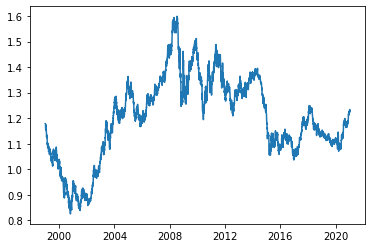

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

If we look at the line's shape, we see many small wiggles — rather than seeing a smooth line. The wiggles, however, have meaning: : they are the visual representation of the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years).

[]

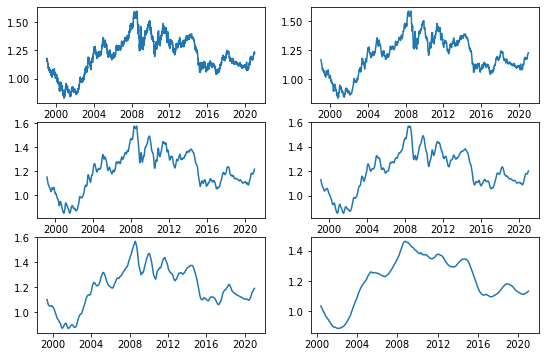

In [27]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(9,6))

ax[0,0].plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
ax[0,1].plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'].rolling(7).mean())
ax[1,0].plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'].rolling(30).mean())
ax[1,1].plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'].rolling(50).mean())
ax[2,0].plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'].rolling(100).mean())
ax[2,1].plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'].rolling(365).mean())

plt.plot()